# Problem set 2
## Hongsup Oh

# Library

In [1]:
import numpy as np
import math
import csv
import json
import collections
from collections import defaultdict
import pandas as pd
from matplotlib import pyplot as plt

# Help functions

In [2]:
def openData(file,intercept=None):
    f = pd.read_csv(file)
    x = []
    if intercept==True:
        x.append([1.0 for x in range(len(list(f['x0'])))])
    x.append(list(f['x0']))
    x.append(list(f['x1']))
    y = list(f['y'])
    x = np.array(x)
    x = x.T
    y = np.array(y)
    y = y.T
    if 't' in f:
        t = list(f['t'])
        t = np.array(t)
        t = t.T
        return t,x,y
    return x,y

In [3]:
def plotData(x,y,theta,correction):
    plt.figure(figsize=(5,5))
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)
    # Plot decision boundary (found by solving for theta^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2)
    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid()

In [4]:
def plot_contour(predict_fn):
    x, y = np.meshgrid(np.linspace(-10, 10, num=20), np.linspace(-10, 10, num=20))
    z = np.zeros(x.shape)

    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            z[i, j] = predict_fn([x[i, j], y[i, j]])

    plt.contourf(x, y, z, levels=[-float('inf'), 0, float('inf')], colors=['orange', 'cyan'])

In [5]:
def plot_points(x,y):
    x_one = x[y == 0, :]
    x_two = x[y == 1, :]
    
    plt.scatter(x_one[:,0], x_one[:,1], marker='x', color='red')
    plt.scatter(x_two[:,0], x_two[:,1], marker='o', color='blue')

In [6]:
def load_spam_dataset(tsv_path):

    messages = []
    labels = []

    with open(tsv_path, 'r', newline='', encoding='utf8') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')

        for label, message in reader:
            messages.append(message)
            labels.append(1 if label == 'spam' else 0)

    return messages, np.array(labels)

In [7]:
def write_json(filename, value):
    """Write the provided value as JSON to the given filename"""
    with open(filename, 'w') as f:
        json.dump(value, f)

# 1. Logistic Regression

In [12]:
def calc_grad(X,Y,theta):
    m,n = X.shape
    margins = Y*X.dot(theta)
    probs = 1/(1+np.exp(margins))
    grad = -(1/m)*(X.T.dot(probs*Y))+(0.05/m)*np.linalg.norm(theta)
    return grad

def logistic_regression(X,Y):
    m,n = X.shape
    theta = np.zeros(n)
    i = 1
    learning_rate = 1
    while True:
        i+=1
        prev_theta = theta
        grad = calc_grad(X,Y,theta)
        #print(np.linalg.norm(theta))
        theta = theta - learning_rate*grad
        if i%10000 == 0:
            DEBUG = False
            if DEBUG:
                Y = (Y == 1).astype(np.float)
                plotData(X, (Y == 1), theta, 'output/{}.png'.format(i))
            print('Finished %d iterations' % i)
            print(np.linalg.norm(prev_theta - theta))
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d interations' % i)
            break
    return theta

def main():
    DEBUG = False
    if DEBUG:
        plt.figure()
        path_a = 'data/ds1_a.csv'
        Xa,Ya = openData(path_a,intercept=False)
        Ya = (Ya == 1).astype(np.float)
        plot_points(Xa,Ya)
        
        plt.figure()
        path_b = 'data/ds1_b.csv'
        Xb,Yb = openData(path_b,intercept=False)
        Yb = (Yb == 1).astype(np.float)
        plot_points(Xb,Yb)
        plt.show()
        import sys
        sys.exit()
        
    print('==== Training model on data set A ====')
    path_a = 'data/ds1_a.csv'
    Xa,Ya = openData(path_a,intercept=True)
    theta = logistic_regression(Xa, Ya)
    plotData(Xa, (Ya == 1), theta,1)
    
    print('\n==== Training model on data set B ====')
    path_b = 'data/ds1_b.csv'
    Xb,Yb = openData(path_b,intercept=True)
    theta = logistic_regression(Xb, Yb)
    plotData(Xb, (Yb == 1), theta,1)
                

==== Training model on data set A ====
Finished 10000 iterations
3.462451190770352e-07
Finished 20000 iterations
1.7561151579607395e-11
Converged in 29397 interations

==== Training model on data set B ====
Finished 10000 iterations
2.5087134225542187e-06
Finished 20000 iterations
1.0885851292593219e-09
Finished 30000 iterations
4.729681433408944e-13
Converged in 37346 interations


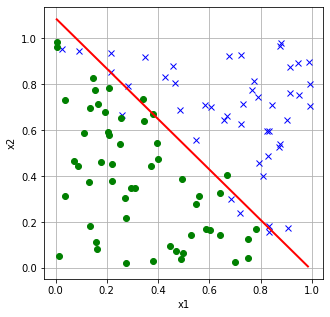

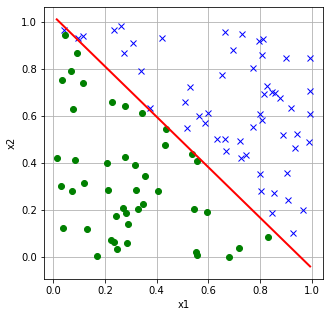

In [13]:
main()

## a. 

Training dataset A is finished within few iterations but dataset B is not converged

## b. 

Text(0.5, 1.0, 'Dataset A')

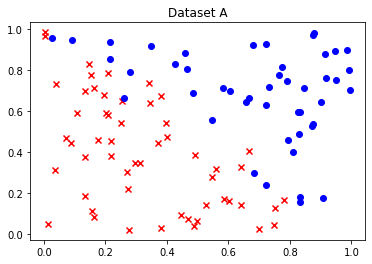

In [14]:
plt.figure()
path_a = 'data/ds1_a.csv'
Xa,Ya = openData(path_a,intercept=False)
Ya = (Ya == 1).astype(np.float)
plot_points(Xa,Ya)
plt.title("Dataset A")

Text(0.5, 1.0, 'Dataset B')

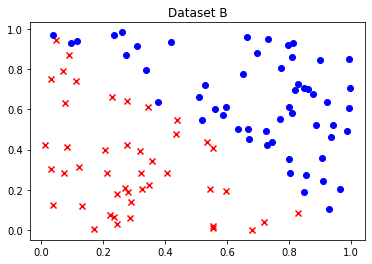

In [15]:
plt.figure()
path_b = 'data/ds1_b.csv'
Xb,Yb = openData(path_b,intercept=False)
Yb = (Yb == 1).astype(np.float)
plot_points(Xb,Yb)
plt.title("Dataset B")

Unlike dateset A, Dataset B can be linearly seperable
$L(\theta)= \prod_{i=1}^m p(y^{(i)}|x^{(i)};\theta)=\frac{1}{1+e^{-y^{(i)}\theta^Tx^{(i)}}}$
If the dataset can be linearly sepearble, then some dataset $\theta,y^{(i)}\theta^Tx^{(i)}$ is always positive.
<br>
In this case, we can muliply $\theta$ by a larger scalar to get larger $L(\theta)$
However, when the dataset is not linearly separable, it is not the case.

## c. 

### i. Using a different constant learning rate.
Answer: No. $L(\theta)$ will be arbitrary large
<br>
### ii. Decreasing the learning rate over time
Answer: Yes. If the learning rate is sufficiently small, updated $\theta$ will be small, so it will judged to be converged
<br>
### iii. Linear scaling of the input features 
Answer: No. dataset still be in linearly seperable
### iv. Adding a regularization term $|\theta|_{2}^2 $ to the loss function
Answer: Yes. It will very likely make the dataset not linearly seperable
<br>
### v. Adding zero-mean Gaussian noise to the training data or labels.
Answer: Yes. It will make the dataset not linearly seperable

# 2. Model calibration

## a.

### problem
\begin{align}
\frac{\sum_{i \in I_{a,b}}P(y^{(i)}=1|x^{(i)};\theta)}{|i \in I_{a,b}|} = \frac{\sum_{i \in I_{a,b}} I(y^{(i)}=1)}{|i \in I_{a,b}|}\\
\text{That is, prove } \sum_{i \in I_{a,b}}h_{\theta}(x^{(i)}) = \sum_{i \in I_{a,b}} y^{(i)}\\
\text{where }h_{\theta}(x^{(i)}) = \frac{1}{1+\exp{-\theta^Tx}}\\
\end{align}
### prove
\begin{align}
\frac{\partial}{\partial \theta} l(\theta) = x^T(y-g(\theta^Tx))\\
\text{For best $\theta$, set }\frac{\partial}{\partial \theta} l(\theta) = 0\\
x^T(y-g(\theta^Tx)) = 0\\
x^Ty = x^T h_{\theta}(x)\\
\text{If we only consider intercept row}\\
\sum_{i}y^{(i)} = \sum_{i}h_{\theta}(x^{(i)})\\
\end{align}

## b.

Formally, a model is perfectly calibrated if, for any probability value p, a prediction of a class with confidence p is correct 100xP.
<br>
ANSWER:
<br>
Both the answer are no. Suppose 50% of the data is positive, then a model which
always outputs 0.5 will also be perfectly calibrated. On the other hand, a model that outputs
0.75 for positive examples and 0.25 for negative examples will have perfect accuracy, but is not
perfectly-calibrated

## c.

When a regulization $\lambda|\theta|$ is added, the equation at (a) becomes
<br>
$$ \sum_{i=1}^m y^{(i)} = \sum_{i=1}^m h_{\theta}(x^{(i)})+2\lambda\theta_0$$
Where $\theta_0$ is the parameter for the intercept which is not penalized. In this case regularization have no effect.

# 3. Bayesian Interpretation of Regularization

## a.

### Prove
\begin{align}
\theta_{MAP} = argmax_{\theta}p(y|x,\theta)p(\theta)\\
\text{we assume that $p(\theta) = p(\theta|x)$}
\end{align}
### Solve
\begin{align}
\theta_{MAP} = argmax_{\theta}p(\theta|x,y)\\
= argmax_{\theta} p(x,y|\theta)p(\theta)\\
= argmax_{\theta} p(y|\theta)p(x|\theta)p(\theta)\\
\text{where, $p(x|\theta)p(\theta) = p(\theta|x) = p(\theta)$}\\
\text{Thus, } \theta_{MAP}argmax_{\theta}p(y|x,\theta)p(\theta)
\end{align}

## b.

### Prove
\begin{align}
\theta_{MAP} = argmin_{\theta} -log(p(y|x,\theta)) + \lambda |\theta|_{2}^2\\
\theta \rightarrow N(0,\eta^2I)\\
\end{align}
### Solve
\begin{align}
\theta_{MAP} = -argmin_{\theta} log(p(\theta|x,y))\\
= -argmin_{\theta} log(p(y|\theta)p(\theta))\\
= -argmin_{\theta}log(p(y|\theta)) - argmin_{\theta} log(p(\theta))\\
= argmin_{\theta}-log(p(y|\theta)) - argmin_{\theta} log(\frac{1}{\sqrt{2\pi(\eta^2I)}} \exp(-\frac{1}{2}\theta^T(\eta^2I)^{-1}\theta))\\
= argmin_{\theta}-log(p(y|\theta)) + argmin_{\theta}\frac{1}{2}\theta^T(\eta^2I)^{-1}\theta)\\
= argmin_{\theta}-log(p(y|\theta)) + \frac{1}{2\eta^2}|\theta|_{2}^2\\
\text{Thus, } \lambda = \frac{1}{2\eta^2}\\
\end{align}

## c.

### problem
\begin{align}
y = \theta^TX + \epsilon\\
\epsilon \rightarrow N(0,\sigma^2)\\
\theta \rightarrow N(0,\eta^2I)\\
\text{get $\theta$}
\end{align}
### solve
\begin{align}
\theta_{MAP} = argmax_{\theta} P(y|x,\theta)P(\theta)\\
\theta_{MAP} = argmax_{\theta} \log(P(y|x,\theta)) + \log(P(\theta))\\
\theta_{MAP} = argmax_{\theta} \log(\frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{1}{2\sigma^2}(\theta^TX - y)^T(\theta^TX - y))) + \log(\frac{1}{\sqrt{2\pi\eta^2}}\exp(-\frac{1}{2\eta^2}\theta^T\theta))\\
\theta_{MAP} = argmax_{\theta} -\frac{1}{2\sigma^2}(\theta^TX - y)^T(\theta^TX - y) + \frac{1}{2\eta^2}\theta^T\theta\\
\theta_{MAP} = argmax_{\theta} -\frac{1}{2\sigma^2}(X^T\theta\theta^TX - X^T\theta y - y^T\theta^T X +y^Ty) + \frac{1}{2\eta^2}\theta^T\theta\\
\nabla_{\theta} (-\frac{1}{2\sigma^2}(X^T\theta\theta^TX - X^T\theta y - y^T\theta^T X +y^Ty) + \frac{1}{2\eta^2}\theta^T\theta) = 0\\
-\frac{1}{\sigma^2}(x^T\theta x- x^Ty) + \frac{1}{\eta^2}\theta = 0\\
\theta = (\frac{1}{\sigma^2}x^Tx + \frac{1}{\eta^2})^{-1}\frac{1}{\sigma^2}x^Ty\\
\text{Thus, } \theta = (x^Tx + \frac{\sigma^2}{\eta^2})^{-1}x^Ty\\
\end{align}

## d.

### Problem
\begin{align}
\text{Laplace distribution is given, $f_{L}(z|\mu,b) = \frac{1}{2b}\exp(-\frac{|z-\mu|}{b}) $}\\ 
y = x^T\theta + \epsilon\\
\epsilon \rightarrow N(0,\sigma^2)\\
\theta \rightarrow L(0,bI)\\
J(\theta) = |X\theta - y|_{2}^2 + \gamma|\theta|_1\\
\text{What is $\gamma$?}\\
\end{align}
### Prove
\begin{align}
\theta_{MAP} = -argmin_{\theta} P(y|x,\theta)P(\theta)\\
\theta_{MAP} = argmin_{\theta} -\log(P(y|x,\theta)) - \log(P(\theta))\\
\theta_{MAP} = argmin_{\theta} -\log(P(y|x,\theta)) - \log(\frac{1}{2b}\exp(-\frac{|\theta|}{b}))\\
\theta_{MAP} = argmin_{\theta} -\log(P(y|x,\theta)) +\frac{|\theta|}{b}\\
\theta_{MAP} = argmin_{\theta} -(\theta^Tx - y)^T(\theta^Tx - y) +\frac{|\theta|}{b}\\
\theta_{MAP} = argmin_{\theta} -|X\theta - y|_{2}^2 +\frac{|\theta|}{b}\\
\text{Thus, $\gamma = \frac{1}{b}$}\\
\end{align}

# 4. Constructing Kernels

## a.

### Problem
\begin{align}
K(x,z) = K_{1}(x,z) + K_{2}(x,z)\\
\end{align}
### (1). Symmetric
\begin{align}
K_{1}(x,z) = \phi_{1}(x)^T\phi_{1}(z) = \phi_{1}(z)^T\phi_{1}(x)\\
K_{2}(x,z) = \phi_{2}(x)^T\phi_{2}(z) = \phi_{2}(z)^T\phi_{2}(x)\\
\text{Thus, $K_{ij} = K_{ji}$}\\
\end{align}
### (2). Semi postivie definite
\begin{align}
z^TKz = \sum_{i}\sum_{j} z_{i}K_{ij}z_{j}\\
=\sum_{i}\sum_{j} z_{i}(K_{1ij} + K_{2ij})z_{j}\\
=\sum_{i}\sum_{j} z_{i}\phi_{1}(x^{i})^T\phi_{1}(x^{j})z_{j} + z_{i}\phi_{2}(x^{i})^T\phi_{2}(x^{j}) z_{j}\\
=\sum_{i}\sum_{j}z_{i}(\sum_{k}\phi_{1k}(x^{i})\phi_{1k}(x^{j})+ \phi_{2k}(x^{i})\phi_{2k}(x^{j}))z_{j}\\
=\sum_{k}\sum_{i}\sum_{j}z_{i}\phi_{1k}(x^{i})\phi_{1k}(x^{j})z_{j} + z_{i}\phi_{2k}(x^{i})\phi_{2k}(x^{j})z_{j}\\
=\sum_{k}(\sum_{i}z_{i}\phi_{1k}(x^i))^2+(\sum_{i}z_{i}\phi_{2k}(x^i))^2 \geq 0\\
\text{Thus, it is a kernel}\\
\end{align}

## b.

### Problem
\begin{align}
K(x,z) = K_{1}(x,z) - K_{2}(x,z)\\
\end{align}
### (1). Symmetric
\begin{align}
K_{1}(x,z) = \phi_{1}(x)^T\phi_{1}(z) = \phi_{1}(z)^T\phi_{1}(x)\\
K_{2}(x,z) = \phi_{2}(x)^T\phi_{2}(z) = \phi_{2}(z)^T\phi_{2}(x)\\
\text{Thus, $K_{ij} = K_{ji}$}\\
\end{align}
### (2). Semi postivie definite
\begin{align}
z^TKz = \sum_{i}\sum_{j} z_{i}K_{ij}z_{j}\\
=\sum_{i}\sum_{j} z_{i}(K_{1ij} - K_{2ij})z_{j}\\
=\sum_{i}\sum_{j} z_{i}\phi_{1}(x^{i})^T\phi_{1}(x^{j})z_{j} - z_{i}\phi_{2}(x^{i})^T\phi_{2}(x^{j}) z_{j}\\
=\sum_{i}\sum_{j}z_{i}(\sum_{k}\phi_{1k}(x^{i})\phi_{1k}(x^{j})- \phi_{2k}(x^{i})\phi_{2k}(x^{j}))z_{j}\\
=\sum_{k}\sum_{i}\sum_{j}z_{i}\phi_{1k}(x^{i})\phi_{1k}(x^{j})z_{j} - z_{i}\phi_{2k}(x^{i})\phi_{2k}(x^{j})z_{j}\\
=\sum_{k}(\sum_{i}z_{i}\phi_{1k}(x^i))^2-(\sum_{i}z_{i}\phi_{2k}(x^i))^2\\
\text{if $(\sum_{i}z_{i}\phi_{1k}(x^i))^2\leq(\sum_{i}z_{i}\phi_{2k}(x^i))^2$, then $z^TKz \leq 0$}\\
\text{Thus, it is not a kernel}\\
\end{align}

## c.

### Problem
\begin{align}
K(x,z) = \alpha K_{1}(x,z)\\
\alpha \in R^+\\
\end{align}
### (1). Symmetric
\begin{align}
\alpha K_{1}(x,z) = \alpha \phi_{1}(x)^T\phi_{1}(z) = \alpha \phi_{1}(z)^T\phi_{1}(x)\\
\text{Thus, $K_{ij} = K_{ji}$}\\
\end{align}
### (2). Semi postivie definite
\begin{align}
z^TKz = \sum_{i}\sum_{j} z_{i}K_{ij}z_{j}\\
=\sum_{i}\sum_{j} z_{i}(\alpha K_{1ij})z_{j}\\
=\alpha\sum_{i}\sum_{j} z_{i}\phi_{1}(x^{i})^T\phi_{1}(x^{j})z_{j}\\
=\alpha\sum_{i}\sum_{j}z_{i}(\sum_{k}\phi_{1k}(x^{i})\phi_{1k}(x^{j}))z_{j}\\
=\alpha\sum_{k}\sum_{i}\sum_{j}z_{i}\phi_{1k}(x^{i})\phi_{1k}(x^{j})z_{j}\\
=\alpha\sum_{k}(\sum_{i}z_{i}\phi_{1k}(x^i))^2 \geq 0\\
\text{Thus, it is a kernel}\\
\end{align}

## d.

### Problem
\begin{align}
K(x,z) = -\alpha K_{1}(x,z)\\
\alpha \in R^+\\
\end{align}
### (1). Symmetric
\begin{align}
-\alpha K_{1}(x,z) = -\alpha \phi_{1}(x)^T\phi_{1}(z) = -\alpha \phi_{1}(z)^T\phi_{1}(x)\\
\text{Thus, $K_{ij} = K_{ji}$}\\
\end{align}
### (2). Semi postivie definite
\begin{align}
z^TKz = \sum_{i}\sum_{j} z_{i}K_{ij}z_{j}\\
=\sum_{i}\sum_{j} z_{i}(-\alpha K_{1ij})z_{j}\\
=-\alpha\sum_{i}\sum_{j} z_{i}\phi_{1}(x^{i})^T\phi_{1}(x^{j})z_{j}\\
=-\alpha\sum_{i}\sum_{j}z_{i}(\sum_{k}\phi_{1k}(x^{i})\phi_{1k}(x^{j}))z_{j}\\
=-\alpha\sum_{k}\sum_{i}\sum_{j}z_{i}\phi_{1k}(x^{i})\phi_{1k}(x^{j})z_{j}\\
=-\alpha\sum_{k}(\sum_{i}z_{i}\phi_{1k}(x^i))^2 < 0\\
\text{Thus, it is not a kernel}\\
\end{align}

## e.

### Problem
\begin{align}
K(x,z) = K_{1}(x,z)K_{2}(x,z)\\
\end{align}
### (1). Symmetric
\begin{align}
K_{1}(x,z) = \phi_{1}(x)^T\phi_{1}(z) = \phi_{1}(z)^T\phi_{1}(x)\\
K_{2}(x,z) = \phi_{2}(x)^T\phi_{2}(z) = \phi_{2}(z)^T\phi_{2}(x)\\
\text{Thus, $K_{ij} = K_{ji}$}\\
\end{align}
### (2). Semi postivie definite
\begin{align}
z^TKz = \sum_{i}\sum_{j} z_{i}K_{ij}z_{j}\\
=\sum_{i}\sum_{j} z_{i}(K_{1ij}K_{2ij})z_{j}\\
=\sum_{i}\sum_{j} z_{i}\phi_{1}(x^{i})^T\phi_{1}(x^{j})\phi_{2}(x^{i})^T\phi_{2}(x^{j}) z_{j}\\
=\sum_{i}\sum_{j}z_{i}(\sum_{k}\phi_{1k}(x^{i})\phi_{1k}(x^{j})\sum_{p} \phi_{2p}(x^{i})\phi_{2p}(x^{j}))z_{j}\\
=\sum_{k}\sum_{p}(\sum_{i}z_{i}\phi_{1k}(x^{i})\phi_{2p}(x^{i}))(\sum_{j}z_{j}\phi_{1k}(x^{j})\phi_{2p}(x^{j}))\\
=\sum_{k}\sum_{p}(\sum_{i}z_{i}\phi_{1k}(x^i)\phi_{2k}(x^i))^2 \geq 0\\
\text{Thus, it is a kernel}\\
\end{align}

## f.

### Problem
\begin{align}
K(x,z) = f(x)f(z)\\
f: R^n \rightarrow R\\
\end{align}
### (1). Symmetric
\begin{align}
K(x,z) = f(x)^Tf(z) = f(z)^Tf(x)\\
\text{Thus, $K_{ij} = K_{ji}$}\\
\end{align}
### (2). Semi postivie definite
\begin{align}
z^TKz = \sum_{i}\sum_{j} z_{i}K_{ij}z_{j}\\
=\sum_{i}\sum_{j} z_{i}(f(x^i)^Tf(x^j))z_{j}\\
=\sum_{i}\sum_{j}z_{i}(\sum_{k}f_{k}(x^{i})f_{k}(x^{j}))z_{j}\\
=\sum_{k}\sum_{i}\sum_{j}z_{i}f_{k}(x^{i})f_{fk}(x^{j})z_{j}\\
=\sum_{k}(\sum_{i}z_{i}f_{k}(x^i))^2 \geq 0\\
\text{Thus, it is a kernel}\\
\end{align}

## g.

### Problem
\begin{align}
K(x,z) = K_{3}(\phi(x),\phi(z))\\
\end{align}
### (1). Symmetric
\begin{align}
K_{3}(x,z) = \phi_{3}(\phi(x))^T\phi_{3}(\phi(z)) = \phi_{3}(\phi(z))^T\phi_{3}(\phi(x))\\
\text{Thus, $K_{ij} = K_{ji}$}\\
\end{align}
### (2). Semi postivie definite
\begin{align}
z^TKz = \sum_{i}\sum_{j} z_{i}K_{ij}z_{j}\\
=\sum_{i}\sum_{j} z_{i}K_{3ij}z_{j}\\
=\sum_{i}\sum_{j} z_{i}\phi_{3}(\phi(x^{i}))^T\phi_{3}(\phi(x^{j}))z_{j}\\
=\sum_{i}\sum_{j}z_{i}(\sum_{k}\phi_{3k}(\phi(x^{i}))\phi_{3k}(\phi(x^{j})))z_{j}\\
=\sum_{k}\sum_{i}\sum_{j}z_{i}\phi_{3k}(\phi(x^{i}))\phi_{3k}(\phi(x^{j}))z_{j}\\
=\sum_{k}(\sum_{i}z_{i}\phi_{3k}(\phi(x^i)))^2 \geq 0\\
\text{Thus, it is a kernel}\\
\end{align}

## h.

### Problem
\begin{align}
K(x,z) = p(K_{1}(x,z))\\
\text{p(x): a polynomial over x with positive coefficient}\\
\end{align}
### (1). Symmetric
\begin{align}
K_{1}(x,z) = \phi_{1}(x)^T\phi_{1}(z) = \phi_{1}(z)^T\phi_{1}(x)\\
p(K_{1}(x,z))=p(K_{1}(z,x))\\
\text{Thus, $K_{ij} = K_{ji}$}\\
\end{align}
### (2). Semi postivie definite
\begin{align}
z^TKz = \sum_{i}\sum_{j} z_{i}K_{ij}z_{j}\\
=\sum_{i}\sum_{j} z_{i}p(K_{1ij})z_{j}\\
=\sum_{l=0}^k a_l\sum_{i}\sum_{j}z_{i}K_{1ij}^lz_{j}\\
=\sum_{l=0}^k a_{l}z^TK_{1}^lz
\text{Thus, it is a kernel}\\
\end{align}

# 5. Kernelizing the Perceptron

## a.

### i. How to represent the high-dimensional parameter vector $\theta^{(i)}$
Initially set $\theta$ as 0 (zero). That is $\theta^{0}$ is n dimension zero vector (or empty vector).
<br>
$\theta^{(i)}$ can be represented as linear combination of $\phi(x^1),\phi(x^2),...,\phi(x^i)$
### ii. How to compute $h_{\theta^{(i)}}(x^{(i+1)}) = g(\theta^{(i)^T} \phi(x^{(i)}))$
set $\theta$ as 0 (zero), $\beta$ as 0 (zero), and $\theta^{(i)} = \sum_{j=1}^n \beta_{j}\phi(x^j)$.
\begin{align}
h_{\theta^{(i)}}(x^{(i+1)}) = g(\theta^{(i)^T}\phi(x^{(i+1)}))\\
= g(\sum_{(j=1)}^i \beta_j\phi(x^(j))\phi(x^{(i+1)}))\\
= g(\sum_{(j=1)}^i \beta_j K(x^j,x^{(i+1)}))\\
\end{align}
### iii. How you will modify the update rule given above to perform an update to $\theta$ 
$\beta_{(i+1)} = \beta{(i)} + \alpha(y^{(i+1)} - h_{\theta^{(i)}}(x^{(i+1)}))$
<br>
Update, $\alpha(y^{(i+1)} - h_{\theta^{(i)}}(x^{(i+1)}))$

In [16]:
class KernelizingThePerceptron(object):
    def __init__(self):
        self.state = []
        
    def predict(self, kernel, x_i):
        val = 0
        for coef, x in self.state:
            val += coef*kernel(x,x_i)
        return self.sign(val)
    
    def update_state(self, kernel, learning_rate,x_i, y_i):
        h_x = self.predict(kernel,x_i)
        coef = learning_rate*(y_i - h_x)
        self.state.append((coef,x_i))
    
    def sign(self, a):
        if a>=0:
            return 1
        else:
            return 0
    
    def dot_kernel(self,a,b):
        return np.dot(a,b)
    
    def rbf_kernel(self,a,b,sigma=1):
        distance = (a-b).dot(a-b)
        scaled_distance = -distance/(2*(sigma)**2)
        return math.exp(scaled_distance)
    
    def train_perceptron(self,kernel_name, kernel, learning_rate):
        train_path = 'data/ds5_train.csv'
        train_x, train_y = openData(train_path)
        for x_i,y_i in zip(train_x,train_y):
            self.update_state(kernel,learning_rate,x_i,y_i)
        
        test_path = 'data/ds5_test.csv'
        test_x, test_y = openData(test_path)
        
        plt.figure(figsize=(5,5))
        plot_contour(lambda a: self.predict(kernel,a))
        plot_points(test_x,test_y)
        plt.savefig('p05_{}_output.pdf'.format(kernel_name))
        
        predict_y = [self.predict(kernel, test_x[i, :]) for i in range(test_y.shape[0])]
        
        np.savetxt('p05_{}_predictions'.format(kernel_name), predict_y)
    
    def main(self):
        self.train_perceptron('dot',self.dot_kernel,0.5)
        self.train_perceptron('rbf',self.rbf_kernel,0.5)
        

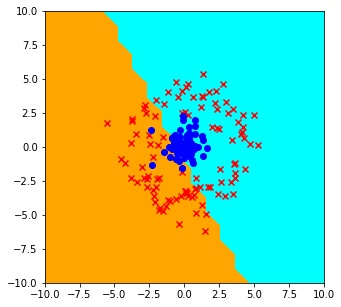

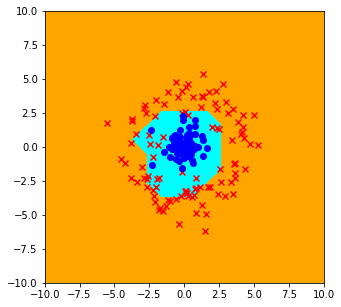

In [17]:
KP = KernelizingThePerceptron()
KP.main()

# 6. Spam classification

## SVM

In [31]:
class SVM(object):
    def train_and_predict_svm(self,train_matrix, train_labels, test_matrix, radius):
        model = self.svm_train(train_matrix,train_labels,radius)
        return self.svm_predict(model,test_matrix,radius)
    
    def svm_train(self,matrix,category, radius):
        state = {}
        M,N = matrix.shape
        Y = 2*category - 1
        matrix = 1.*(matrix>0)
        squared = np.sum(matrix*matrix,axis=1)
        gram = matrix.dot(matrix.T)
        K = np.exp(-(squared.reshape((1, -1)) + squared.reshape((-1, 1)) - 2 * gram) / (2 * (radius ** 2)) )
        
        alpha = np.zeros(M)
        alpha_avg = np.zeros(M)
        L = 1./(64*M)
        outer_loops = 10
        
        alpha_avg
        for ii in range(outer_loops*M):
            i = int(np.random.rand()*M)
            margin = Y[i]*np.dot(K[i,:],alpha)
            grad = M*L*K[:,i]*alpha[i]
            if (margin < 1):
                grad -= Y[i]*K[:,i]
            alpha -= grad/np.sqrt(ii+1)
            alpha_avg += alpha
        
        alpha_avg /= (ii+1)*M
        
        state['alpha'] = alpha
        state['alpha_avg'] = alpha_avg
        state['Xtrain'] = matrix
        state['Sqtrain'] = squared
        return state
    
    def svm_predict(self,state,matrix,radius):
        M,N = matrix.shape
        output = np.zeros(M)
        Xtrain = state['Xtrain']
        Sqtrain = state['Sqtrain']
        matrix = 1.*(matrix>0)
        squared = np.sum(matrix*matrix,axis=1)
        gram = matrix.dot(Xtrain.T)
        K = np.exp(-(squared.reshape((-1, 1)) + Sqtrain.reshape((1, -1)) - 2 * gram) / (2 * (radius ** 2)))
        alpha_avg = state['alpha_avg']
        preds = K.dot(alpha_avg)
        output = (1 + np.sign(preds))//2
        return output

## Spam

In [74]:
class SPAM(object):
    def get_words(self,message):
        return [word.lower() for word in message.split()]
    
    def create_dictionary(self,messages):
        temp = defaultdict(int)
        mapping = defaultdict(int)
        i = 0
        for message in messages:
            words = self.get_words(message)
            for word in words:
                temp[word]+=1
                if temp[word] == 5:
                    mapping[word] = i
                    i+=1
        return mapping
    
    def transform_text(self,messages,word_dictionary):
        M,N = len(messages), len(word_dictionary)
        data = np.zeros((M,N))
        for i,message in enumerate(messages):
            for word in self.get_words(message):
                if word in word_dictionary:
                    j = word_dictionary[word]
                    data[i,j]+=1
        return data 
    
    def fit_naive_bayes_model(self,matrix,labels):
        #labels = labels.astype(np.bool)
        M,V = matrix.shape
        phi_k = np.zeros((2,V))
        phi_k[0] = matrix[labels==0].sum(axis=0)
        phi_k[1] = matrix[labels==1].sum(axis=0)
        # Laplace smoothing
        phi_k+=1
        # Normalize
        phi_k[0] = phi_k[0]/phi_k[0].sum()
        phi_k[1] = phi_k[1]/phi_k[1].sum()
        #phi_k = phi_k/phi_k.sum(axis=1,keepdims=True)
        phi_y = labels.sum()/labels.shape[0]
        return phi_k,phi_y
    
    def predict_from_naive_bayes_model(self,model,matrix):
        phi_k,phi_y = model
        log_likelihood = np.sum(matrix[:,None]*np.log(phi_k),axis=-1)
        log_likelihood[:,0] += np.log(1-phi_y)
        log_likelihood[:,1] += np.log(phi_y)
        return np.argmax(log_likelihood,axis=1)
    
    def get_top_five_naive_bayes_words(self,model,dictionary):
        phi_k,phi_y = model
        ratio = phi_k[1]/phi_k[0]
        indices = np.argsort(ratio)[-5:][::-1]
        idx2word = {v:k for k, v in dictionary.items()}
        words = [idx2word[idx] for idx in indices]
        return words
    
    def compute_best_svm_radius(self,train_matrix, train_labels, val_matrix, val_labels, radius_to_consider):
        best_rad, best_acc = 0,0
        for radius in radius_to_consider:
            svm = SVM()
            pred = svm.train_and_predict_svm(train_matrix, train_labels, val_matrix, radius)
            acc = (pred == val_labels).sum() / len(pred)
            if acc > best_acc:
                best_rad = radius
                best_acc = acc
        return best_rad
    
    def main(self):
        train_path = 'data/ds6_train.tsv'
        train_messages, train_labels =  load_spam_dataset(train_path)
        val_path = 'data/ds6_val.tsv'
        val_messages, val_labels = load_spam_dataset(val_path)
        test_path = 'data/ds6_test.tsv'
        test_messages, test_labels = load_spam_dataset(test_path)
        
        dictionary = self.create_dictionary(train_messages)
        write_json('p06_dictionary', dictionary)
        
        train_matrix = self.transform_text(train_messages, dictionary)
        np.savetxt('p06_sample_train_matrix', train_matrix[:100,:])
        
        val_matrix = self.transform_text(val_messages, dictionary)
        test_matrix = self.transform_text(test_messages, dictionary)
        
        naive_bayes_model = self.fit_naive_bayes_model(train_matrix, train_labels)
        naive_bayes_predictions = self.predict_from_naive_bayes_model(naive_bayes_model, test_matrix)
        
        np.savetxt('p06_naive_bayes_predictions', naive_bayes_predictions)

        naive_bayes_accuracy = np.mean(naive_bayes_predictions == test_labels)
        print('Naive Bayes had an accuracy of {} on the testing set'.format(naive_bayes_accuracy))
        
        top_5_words = self.get_top_five_naive_bayes_words(naive_bayes_model, dictionary)
        
        print('The top 5 indicative words for Naive Bayes are: ', top_5_words)
        
        write_json('p06_top_indicative_words', top_5_words)
        optimal_radius = self.compute_best_svm_radius(train_matrix, train_labels, val_matrix, val_labels, [0.01, 0.1, 1, 10])
        
        write_json('p06_optimal_radius', optimal_radius)
        
        print('The optimal SVM radius was {}'.format(optimal_radius))
        svm = SVM()
        svm_predictions = svm.train_and_predict_svm(train_matrix, train_labels, test_matrix, optimal_radius)
        
        svm_accuracy = np.mean(svm_predictions == test_labels)
        print('The SVM model had an accuracy of {} on the testing set'.format(svm_accuracy, optimal_radius))

In [75]:
spam = SPAM()
spam.main()

Naive Bayes had an accuracy of 0.978494623655914 on the testing set
The top 5 indicative words for Naive Bayes are:  ['claim', 'won', 'prize', 'tone', 'urgent!']
The optimal SVM radius was 0.1
The SVM model had an accuracy of 0.9713261648745519 on the testing set
